In [ ]:
from utils import decode  # Ensure you have your decode function imported
from pymongo import MongoClient
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from pySankey.sankey import sankey

In [144]:

images = []

# Connect to MongoDB
mongo_connection_string = os.getenv("MONGO_CONNECTION_STRING")
mongo_db_name = os.getenv("MONGO_DB_NAME")
mongo_collection_name = os.getenv("MONGO_COLLECTION_NAME")

# Connect to MongoDB
client = MongoClient(mongo_connection_string)
db = client[mongo_db_name]
collection = db[mongo_collection_name]

# Retrieve all the images from the database
cursor = collection.find({})
for document in cursor:
    images.append(document)



#create df

df = pd.DataFrame(images)
df.to_csv('images.csv', index=False)

In [252]:
import pandas as pd
df = pd.read_csv('images.csv')
df.head()

,_id,image,date,time,predicted,real,person_thrown,qr_scanned
0,66e145253120393632f689b4,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:21:50,yellow,yellow,yellow,0
1,66e14bdf3120393632f689b5,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:50:41,brown,blue,brown,0
2,66e14bfd3120393632f689b6,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:51:02,blue,blue,blue,0
3,66e14c1f3120393632f689b7,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:51:37,blue,blue,blue,0
4,66e153673120393632f689b8,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,10:22:39,blue,blue,blue,0


In [253]:
#sort by date and if equal by time
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['date', 'time'], ascending=[True, True])
df.head()

,_id,image,date,time,predicted,real,person_thrown,qr_scanned
0,66e145253120393632f689b4,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:21:50,yellow,yellow,yellow,0
1,66e14bdf3120393632f689b5,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:50:41,brown,blue,brown,0
2,66e14bfd3120393632f689b6,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:51:02,blue,blue,blue,0
3,66e14c1f3120393632f689b7,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:51:37,blue,blue,blue,0
4,66e153673120393632f689b8,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,10:22:39,blue,blue,blue,0


# Analysis by date

In [254]:
# 2024-09-11 - day 1
# 2024-09-12 - day 2
# 2024-09-13 - day 3
# 2024-09-16 - day 4
# 2024-09-17 - day 5
df_day1 = df[df['date'] == '2024-09-17']
df_day2 = df[df['date'] == '2024-09-12']
df_day3 = df[df['date'] == '2024-09-13']
df_day4 = df[df['date'] == '2024-09-16']
df_day5 = df[df['date'] == '2024-09-17']


In [255]:
# create column called day and assign the day number to each dataframe
df_day1['day'] = 1
df_day2['day'] = 2
df_day3['day'] = 3
df_day4['day'] = 4
df_day5['day'] = 5

/tmp/ipykernel_144314/3207468770.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_144314/3207468770.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_144314/3207468770.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

In [256]:
df = pd.concat([df_day1, df_day2, df_day3, df_day4, df_day5])
df = df.reset_index(drop=True)
# drop _id and image columns
df = df.drop(columns=['_id', 'image', "date"])
df.head()

,time,predicted,real,person_thrown,qr_scanned,day
0,08:21:04,yellow,yellow,NaN,0,1
1,08:48:05,blue,blue,blue,0,1
2,08:55:42,blue,blue,blue,0,1
3,10:46:05,yellow,yellow,NaN,0,1
4,12:28:06,brown,brown,brown,0,1


In [257]:
df.shape
#df.to_csv('raw_itrash.csv', index=False)

(79, 6)

In [258]:
#substitute nan with "nonthrown" in person_thrown
df['person_thrown'] = df['person_thrown'].fillna("nonthrown")
df["predicted"] = df["predicted"].fillna("nonpredicted")
df["real"] = df["real"].fillna("nonclassified")

In [259]:
#take the rows where person_thrown is not null
df_thrown = df[df['person_thrown'] != "nonthrown"]
df_thrown

,time,predicted,real,person_thrown,qr_scanned,day
1,08:48:05,blue,blue,blue,0,1
2,08:55:42,blue,blue,blue,0,1
4,12:28:06,brown,brown,brown,0,1
6,13:26:29,yellow,yellow,yellow,0,1
7,13:27:03,yellow,yellow,blue,0,1
...,...,...,...,...,...,...
74,13:27:03,yellow,yellow,blue,0,5
75,13:27:13,yellow,yellow,blue,0,5
76,13:27:24,yellow,yellow,yellow,0,5
77,15:19:12,brown,yellow,brown,0,5


In [260]:
df_thrown['thrown_real'] = df_thrown['person_thrown'] == df_thrown['real']
df_thrown['thrown_predited'] = df_thrown['person_thrown'] == df_thrown['predicted']
df_thrown['predicted_real'] = df_thrown['predicted'] == df_thrown['real']
df_thrown['thrown_real'] = df_thrown['thrown_real'].astype(int)
df_thrown['thrown_predited'] = df_thrown['thrown_predited'].astype(int)
df_thrown['predicted_real'] = df_thrown['predicted_real'].astype(int)
#df_thrown

/tmp/ipykernel_144314/3804818731.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_144314/3804818731.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_144314/3804818731.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

In [261]:
df_thrown["real"].value_counts()

real
yellow    36
blue      17
brown     14
Name: count, dtype: int64

In [262]:
df_thrown["predicted"].value_counts()

predicted
yellow    32
brown     21
blue      14
Name: count, dtype: int64

In [263]:
# groupby day and count rows
df_thrown.groupby('day').count()

,time,predicted,real,person_thrown,qr_scanned,thrown_real,thrown_predited,predicted_real
day,,,,,,,,
1,9,9,9,9,9,9,9,9
2,17,17,17,17,17,17,17,17
3,17,17,17,17,17,17,17,17
4,15,15,15,15,15,15,15,15
5,9,9,9,9,9,9,9,9


In [264]:
#groupby day and take the mean of thrown_real
df_thrown[["day", "thrown_real", 'thrown_predited', 'predicted_real'  ]].groupby('day').mean()

,thrown_real,thrown_predited,predicted_real
day,,,
1,0.666667,0.777778,0.888889
2,0.529412,0.705882,0.823529
3,0.823529,0.764706,0.705882
4,0.466667,0.466667,0.866667
5,0.666667,0.777778,0.888889


In [265]:
#calculate ratio of correct predictions
df_thrown['thrown_real'].mean()

np.float64(0.6268656716417911)

In [266]:
df_thrown['thrown_predited'].mean()

np.float64(0.6865671641791045)

In [267]:
df_thrown['predicted_real'].mean()

np.float64(0.8208955223880597)

In [268]:
# GROUPBY DAY AND GET HOW MANY QR SCANNED
df_thrown[["day", "qr_scanned"]].groupby('day').sum()

,qr_scanned
day,
1,0
2,2
3,2
4,0
5,0


# Get N for each color each day

In [269]:
df_thrown.real.unique(), df_thrown.predicted.unique()

(array(['blue', 'brown', 'yellow'], dtype=object),
 array(['blue', 'brown', 'yellow'], dtype=object))

In [270]:
#get yellow, blue and brown counts for each day
df_thrown.groupby('day').apply(lambda x: x['predicted'].value_counts())

/tmp/ipykernel_144314/2879380328.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



day  predicted
1    yellow        4
     brown         3
     blue          2
2    yellow       12
     blue          3
     brown         2
3    brown         8
     yellow        5
     blue          4
4    yellow        7
     brown         5
     blue          3
5    yellow        4
     brown         3
     blue          2
Name: count, dtype: int64

In [271]:
#get yellow, blue and brown counts for each day
df_thrown.groupby('day').apply(lambda x: x['real'].value_counts())

/tmp/ipykernel_144314/2753731640.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



day  real  
1    yellow     5
     blue       2
     brown      2
2    yellow    11
     blue       5
     brown      1
3    blue       7
     yellow     6
     brown      4
4    yellow     9
     brown      5
     blue       1
5    yellow     5
     blue       2
     brown      2
Name: count, dtype: int64

In [272]:
#get yellow, blue and brown counts for each day
df_thrown.groupby('day').apply(lambda x: x['person_thrown'].value_counts())

/tmp/ipykernel_144314/1485725711.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



day  person_thrown
1    blue             4
     brown            3
     yellow           2
2    yellow           9
     brown            7
     blue             1
3    blue             8
     yellow           5
     brown            4
4    yellow           7
     blue             7
     brown            1
5    blue             4
     brown            3
     yellow           2
Name: count, dtype: int64

In [273]:
df_thrown["predicted"].value_counts()

predicted
yellow    32
brown     21
blue      14
Name: count, dtype: int64

In [274]:
df_thrown["real"].value_counts()

real
yellow    36
blue      17
brown     14
Name: count, dtype: int64

# Pred vs Real 

We calculate the precision of the model with the entire dataset ( even if the item has not been thrown to the trashcan).

In [275]:
df_thrown['pred_vs_real'] = np.where(df_thrown['real'] == df_thrown['predicted'], 1, 0)

/tmp/ipykernel_144314/102404890.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [276]:
#calculate mean of correct values
mean_correct = df_thrown['pred_vs_real'].mean()
mean_correct

np.float64(0.8208955223880597)

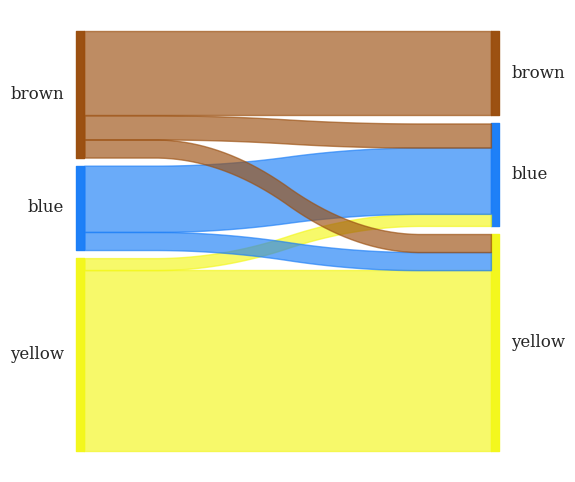

In [301]:
# sankey plot

colors = {
    "apple": "#f71b1b",
    "blue": "#1b7ef7",
    "yellow": "#f3f71b",
    "lime": "#12e23f",
    "brown": "#9b4f0f",
    "nonthrown": "#000000",
    "nonclassified": "#000000",
}

left_order = ["yellow", "blue", "brown"]
right_order = ["yellow", "blue", "brown"]

sankey(df_thrown["predicted"], df_thrown["real"], aspect=20, colorDict=colors, fontsize=12, leftLabels=left_order, rightLabels=right_order)

In [278]:
#YELLOW
print('Pred yellow, real yellow:', df_thrown[(df_thrown['predicted'] == 'yellow') & (df_thrown['real'] == 'yellow')].day.count())
print('Pred blue, real yellow:', df_thrown[(df_thrown['predicted'] == 'blue') & (df_thrown['real'] == 'yellow')].day.count())
print('Pred brown, real yellow:', df_thrown[(df_thrown['predicted'] == 'brown') & (df_thrown['real'] == 'yellow')].day.count())

Pred yellow, real yellow: 30
Pred blue, real yellow: 3
Pred brown, real yellow: 3


In [279]:
#BLUE THROWN
print('Pred yellow, real blue:', df_thrown[(df_thrown['predicted'] == 'yellow') & (df_thrown['real'] == 'blue')].day.count())
print('Pred blue, reak blue:', df_thrown[(df_thrown['predicted'] == 'blue') & (df_thrown['real'] == 'blue')].day.count())
print('Pred brown, real blue:', df_thrown[(df_thrown['predicted'] == 'brown') & (df_thrown['real'] == 'blue')].day.count())


Pred yellow, real blue: 2
Pred blue, reak blue: 11
Pred brown, real blue: 4


In [280]:
#BROWN real
print('Pred yellow, real brown:', df_thrown[(df_thrown['predicted'] == 'yellow') & (df_thrown['real'] == 'brown')].day.count())
print('Pred blue, real brown:', df_thrown[(df_thrown['predicted'] == 'blue') & (df_thrown['real'] == 'brown')].day.count())
print('Pred brown, real brown:', df_thrown[(df_thrown['predicted'] == 'brown') & (df_thrown['real'] == 'brown')].day.count())

Pred yellow, real brown: 0
Pred blue, real brown: 0
Pred brown, real brown: 14


# Pred ^ Real VS Thrown

In [281]:
df_thrown_2 = df_thrown.copy()
# take the rows where real and predicted are the same
df_thrown_2 = df_thrown_2[df_thrown_2['real'] == df_thrown_2['predicted']]
df_thrown_2.shape

(55, 10)

In [282]:
#grouby day and count each color
df_thrown_2.groupby('day').apply(lambda x: x['predicted'].value_counts())

/tmp/ipykernel_144314/3833853614.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



day  predicted
1    yellow        4
     blue          2
     brown         2
2    yellow       10
     blue          3
     brown         1
3    yellow        5
     brown         4
     blue          3
4    yellow        7
     brown         5
     blue          1
5    yellow        4
     blue          2
     brown         2
Name: count, dtype: int64

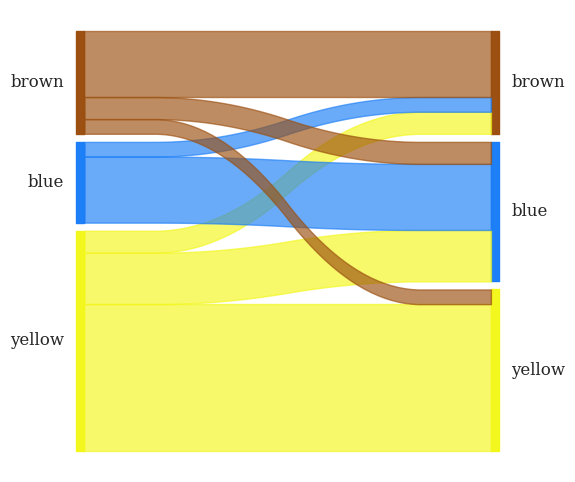

In [283]:
## PRED AND REAL  VS  THROWN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey
colors = {
    "apple": "#f71b1b",
    "blue": "#1b7ef7",
    "yellow": "#f3f71b",
    "lime": "#12e23f",
    "brown": "#9b4f0f",
    "nonthrown": "#000000",
    "nonclassified": "#000000",
}
# Example order for left and right sides
left_order = ["yellow", "blue", "brown"]
right_order = ["yellow", "blue", "brown"]

sankey(left = df_thrown_2["predicted"],
        right =  df_thrown_2["person_thrown"],
        aspect=20, 
        colorDict=colors,
        fontsize=12,
        leftLabels=left_order,
        rightLabels=right_order)

In [284]:
#YELLOW THROWN
print('Pred yellow, thrown yellow:', df_thrown_2[(df_thrown_2['predicted'] == 'yellow') & (df_thrown_2['person_thrown'] == 'yellow')].day.count())
print('Pred blue, thrown yellow:', df_thrown_2[(df_thrown_2['predicted'] == 'blue') & (df_thrown_2['person_thrown'] == 'yellow')].day.count())
print('Pred brown, thrown yellow:', df_thrown_2[(df_thrown_2['predicted'] == 'brown') & (df_thrown_2['person_thrown'] == 'yellow')].day.count())

Pred yellow, thrown yellow: 20
Pred blue, thrown yellow: 0
Pred brown, thrown yellow: 2


In [285]:
#BLUE THROWN
print('Pred yellow, thrown blue:', df_thrown_2[(df_thrown_2['predicted'] == 'yellow') & (df_thrown_2['person_thrown'] == 'blue')].day.count())
print('Pred blue, thrown blue:', df_thrown_2[(df_thrown_2['predicted'] == 'blue') & (df_thrown_2['person_thrown'] == 'blue')].day.count())
print('Pred brown, thrown blue:', df_thrown_2[(df_thrown_2['predicted'] == 'brown') & (df_thrown_2['person_thrown'] == 'blue')].day.count())


Pred yellow, thrown blue: 7
Pred blue, thrown blue: 9
Pred brown, thrown blue: 3


In [286]:
#BROWN THROWN
print('Pred yellow, thrown brown:', df_thrown_2[(df_thrown_2['predicted'] == 'yellow') & (df_thrown_2['person_thrown'] == 'brown')].day.count())
print('Pred blue, thrown brown:', df_thrown_2[(df_thrown_2['predicted'] == 'blue') & (df_thrown_2['person_thrown'] == 'brown')].day.count())
print('Pred brown, thrown brown:', df_thrown_2[(df_thrown_2['predicted'] == 'brown') & (df_thrown_2['person_thrown'] == 'brown')].day.count())

Pred yellow, thrown brown: 3
Pred blue, thrown brown: 2
Pred brown, thrown brown: 9


# QR Analysis

In [287]:
#get items that qr is different from 0
df_thrown[df_thrown['qr_scanned'] != 0]

,time,predicted,real,person_thrown,qr_scanned,day,thrown_real,thrown_predited,predicted_real,pred_vs_real
32,19:17:31,yellow,yellow,yellow,2,2,1,1,1,1
46,15:13:16,blue,blue,blue,2,3,1,1,1,1


# Time analysis

In [288]:
df_thrown

,time,predicted,real,person_thrown,qr_scanned,day,thrown_real,thrown_predited,predicted_real,pred_vs_real
1,08:48:05,blue,blue,blue,0,1,1,1,1,1
2,08:55:42,blue,blue,blue,0,1,1,1,1,1
4,12:28:06,brown,brown,brown,0,1,1,1,1,1
6,13:26:29,yellow,yellow,yellow,0,1,1,1,1,1
7,13:27:03,yellow,yellow,blue,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
74,13:27:03,yellow,yellow,blue,0,5,0,0,1,1
75,13:27:13,yellow,yellow,blue,0,5,0,0,1,1
76,13:27:24,yellow,yellow,yellow,0,5,1,1,1,1
77,15:19:12,brown,yellow,brown,0,5,0,1,0,0


In [289]:
time_dicc = {
    8: "8-9 AM",
    9: "9-10 AM",
    10: "10-11 AM",
    11: "11-12 AM",
    12: "12-1 PM",
    13: "1-2 PM",
    14: "2-3 PM",
    15: "3-4 PM",
    16: "4-5 PM",
    17: "5-6 PM",
    18: "6-7 PM",
    19: "7-8 PM",
}

In [290]:
# create a plot of time 
df_thrown['time'] = pd.to_datetime(df_thrown['time'])
df_thrown['hour'] = df_thrown['time'].dt.hour
df_thrown['period'] = df_thrown['hour'].map(time_dicc)
#sort by period
df_thrown = df_thrown.sort_values(by=['hour'], ascending=True)
#get yellow, blue and brown counts for each day
df_thrown.groupby('day').apply(lambda x: x['predicted'].value_counts())
# get total count by each period
df_thrown.groupby('period').size()

/tmp/ipykernel_144314/1954953360.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipykernel_144314/1954953360.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_144314/1954953360.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_144314/1954953360.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice fro

period
1-2 PM      18
10-11 AM     2
11-12 AM    16
12-1 PM      9
2-3 PM       5
3-4 PM       5
4-5 PM       5
7-8 PM       1
8-9 AM       5
9-10 AM      1
dtype: int64

In [291]:
#count is 1 if
df_time_ = df_thrown.groupby(['day', 'period', 'person_thrown', 'hour']).size().reset_index(name='count')
#sort by period
df_time_ = df_time_.sort_values(by=['hour'], ascending=True)

In [292]:
from itertools import product

# Define the ranges for each column
days = range(1, 6)  # Days from 1 to 5
periods = list(time_dicc.values())
predicted_colors = ['blue', 'yellow', 'brown']  # Colors

# Generate all combinations using itertools.product
combinations = list(product(days, periods, predicted_colors))

# Create a DataFrame with the combinations
df_time = pd.DataFrame(combinations, columns=['day', 'period', 'person_thrown'])

# Add a 'count' column initialized to 0 (or any other value you want
#merge with df_time_ to get the count of each combination
df_time = df_time.merge(df_time_, on=['day', 'period', 'person_thrown'], how='left')
# Fill NaN values with 0
df_time['count'] = df_time['count'].fillna(0)
#reverse time_dicc
time_dicc_reverse = {v: k for k, v in time_dicc.items()}
df_time["hour"] = df_time["period"].map(time_dicc_reverse)
df_time

,day,period,person_thrown,hour,count
0,1,8-9 AM,blue,8,2.0
1,1,8-9 AM,yellow,8,0.0
2,1,8-9 AM,brown,8,0.0
3,1,9-10 AM,blue,9,0.0
4,1,9-10 AM,yellow,9,0.0
...,...,...,...,...,...
175,5,6-7 PM,yellow,18,0.0
176,5,6-7 PM,brown,18,0.0
177,5,7-8 PM,blue,19,0.0
178,5,7-8 PM,yellow,19,0.0


In [293]:
average_counts = df_time.groupby('period')['count'].mean()
average_counts = average_counts.to_dict()
#dict to df
df_average_counts = pd.DataFrame(average_counts.items(), columns=['period', 'average_count'])
df_average_counts["hour"] = df_average_counts["period"].map(time_dicc_reverse)
#sort by hour
df_average_counts = df_average_counts.sort_values(by=['hour'], ascending=True)
df_average_counts


,period,average_count,hour
10,8-9 AM,0.333333,8
11,9-10 AM,0.066667,9
1,10-11 AM,0.133333,10
2,11-12 AM,1.066667,11
3,12-1 PM,0.600000,12
0,1-2 PM,1.200000,13
4,2-3 PM,0.333333,14
5,3-4 PM,0.333333,15
6,4-5 PM,0.333333,16
7,5-6 PM,0.000000,17


In [294]:
#to df 
average_counts = df_time.groupby('period')['count'].mean()
average_counts = average_counts.to_dict()
#dict to df
df_average_counts = pd.DataFrame(average_counts.items(), columns=['period', 'average_count'])
df_average_counts["hour"] = df_average_counts["period"].map(time_dicc_reverse)
#sort by hour
df_average_counts = df_average_counts.sort_values(by=['hour'], ascending=True)
df_average_counts


# Define a custom color palette for Plotly
custom_palette = {
    "blue": "#1b7ef7",
    "yellow": "#fff200",
    "brown": "#9b4f0f",
}


# Create the Plotly boxplot
fig = px.box(
    df_time,
    x='period',
    y='count',
    color='person_thrown',
    color_discrete_map=custom_palette,
    template='plotly_white',
)

# Add a line trace for the average counts
fig.add_trace(
    go.Scatter(
        x=  df_average_counts["period"],  # Periods on the x-axis
        y= df_average_counts["average_count"],  # Average counts on the y-axis
        mode='lines+markers',  # Line with markers
        name='Average Count',
        line=dict(color='black', width=3, dash='dot'),  # Custom line style
        marker=dict(size=7, color='black'),
        connectgaps=False,  # Ensures no connection between non-consecutive points

    )
)

# Update layout for improved aesthetics and spacing
fig.update_layout(
    title=dict(font=dict(size=24), x=0.5),
    xaxis=dict(
        title="Period",
        titlefont=dict(size=28),
        tickfont=dict(size=28),
        tickangle=30,
    ),
    yaxis=dict(
        title="Count",
        titlefont=dict(size=28),
        tickfont=dict(size=28),
        automargin=True,  # Adjusts spacing dynamically
        #tickmode='linear',  # Ensures evenly spaced ticks
        dtick=[1,4],  # Adjust as needed for closer spacing
    ),
    legend=dict(
        title="Predicted",
        title_font=dict(size=22),
        font=dict(size=22),
    ),
    boxmode='group',
    boxgap=0.3,
    boxgroupgap=0.1,
)

# Show the interactive boxplot
fig.show()